## Week 3: Easy Example of PCA

In [66]:
import numpy as np
import matplotlib.pyplot as plt 
plt.rcParams['figure.figsize'] = (12,6)

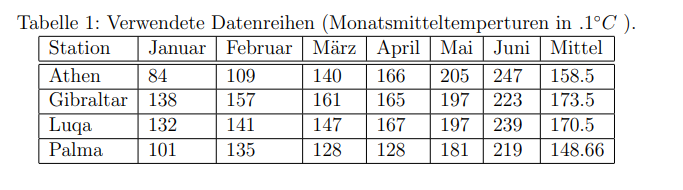

In [67]:
from IPython.display import Image
Image('tab1.png')
#http://www.juergen-grieser.de/germanoldcentury/pdfs/EOF.pdf

Text(0.5, 1.0, 'Mean Temp -Temp at Mediterranean Sea')

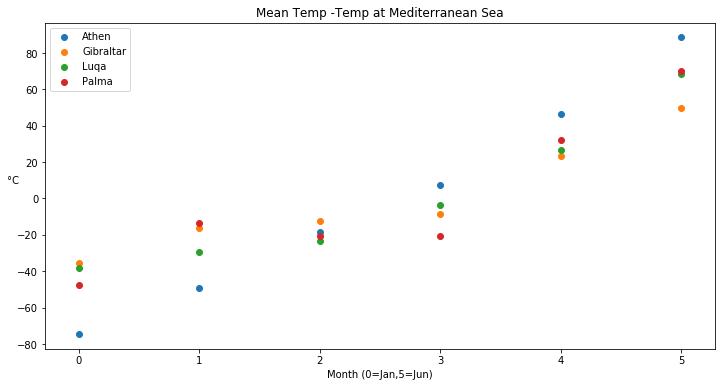

In [68]:
Z = np.array( [[ -74.5, -35.5, -38.5, -47.66],[-49.5, -16.5, -29.5, -13.66],[-18.5, -12.5, -23.5, -20.66],
              [7.5, -8.5, -3.5, -20.66],[46.5, 23.5, 26.5, 32.33],[ 88.5, 49.5, 68.5, 70.33]])
lbl=['Athen','Gibraltar','Luqa','Palma']

plt.figure()
i=0
for l in lbl:    
    plt.scatter( np.linspace(0,5,6),Z[:,i],label=l )
    i=i+1
plt.legend()
plt.xlabel('Month (0=Jan,5=Jun)')
plt.ylabel('°C',rotation=0)
plt.title('Mean Temp -Temp at Mediterranean Sea')

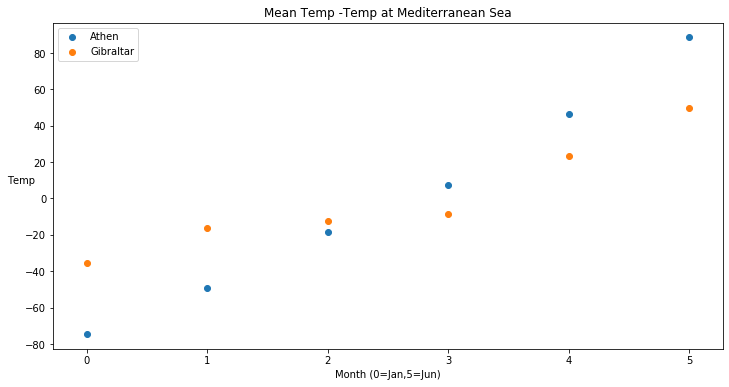

In [69]:
i=0
for l in lbl[0:2]:    
    plt.scatter( np.linspace(0,5,6),Z[:,i],label=l )
    i=i+1
plt.xlabel('Month (0=Jan,5=Jun)')
plt.ylabel('Temp',rotation=0)
plt.title('Mean Temp -Temp at Mediterranean Sea')
plt.legend()

**Covariance between temps; linear dependence**

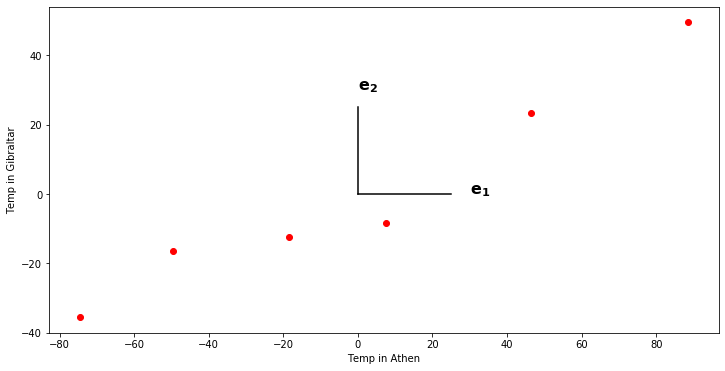

In [70]:
plt.plot((0,25) ,(0,0)  , color='k'  )
plt.plot((0,0) ,(0,25)  , color='k'  )
plt.scatter( Z[:,0],Z[:,1],color='r')
plt.xlabel('Temp in ' +lbl[0])
plt.ylabel('Temp in ' +lbl[1])
plt.text(30, 0, r'$\mathbf{e_{1}}$',fontsize=16)
plt.text(0, 30, r'$\mathbf{e_{2}}$',fontsize=16)
plt.show()

$$
\vec{e_{1}} = \left( \begin{array}{c}
1\\
0\\
\end{array} \right)
$$
$$
\vec{e_{2}} = \left( \begin{array}{c}
0\\
1\\
\end{array} \right)
$$

### Covariance matrix

$$
{\displaystyle \operatorname {K} _{\mathbf {X} \mathbf {X} }={\begin{bmatrix}\mathrm {E} [(X_{1}-\operatorname {E} [X_{1}])(X_{1}-\operatorname {E} [X_{1}])]&\mathrm {E} [(X_{1}-\operatorname {E} [X_{1}])(X_{2}-\operatorname {E} [X_{2}])]&\cdots &\mathrm {E} [(X_{1}-\operatorname {E} [X_{1}])(X_{n}-\operatorname {E} [X_{n}])]\\\\\mathrm {E} [(X_{2}-\operatorname {E} [X_{2}])(X_{1}-\operatorname {E} [X_{1}])]&\mathrm {E} [(X_{2}-\operatorname {E} [X_{2}])(X_{2}-\operatorname {E} [X_{2}])]&\cdots &\mathrm {E} [(X_{2}-\operatorname {E} [X_{2}])(X_{n}-\operatorname {E} [X_{n}])]\\\\\vdots &\vdots &\ddots &\vdots \\\\\mathrm {E} [(X_{n}-\operatorname {E} [X_{n}])(X_{1}-\operatorname {E} [X_{1}])]&\mathrm {E} [(X_{n}-\operatorname {E} [X_{n}])(X_{2}-\operatorname {E} [X_{2}])]&\cdots &\mathrm {E} [(X_{n}-\operatorname {E} [X_{n}])(X_{n}-\operatorname {E} [X_{n}])]\end{bmatrix}}}
$$
(see https://en.wikipedia.org/wiki/Covariance_matrix )

Covariance matrix is **symetric** \
Correlation ==  0, if apart from the principal diagonal all values are zero (diagonal matrix). \
A quadratic matrix is diagonalisable if an invertible matrix satisfies:  
$$
C = V^{-1} D V
$$
$$
V= \left( \vec{v_{1}},\cdots ,\vec{v_{n}} \right)
$$
Vectors $\vec{v_{i}}$ are perpendicular:
$$
\langle \vec{v_{i}},\vec{v_{j}} \rangle=\delta _{i,j}, \\ where \\
\delta _{i,j}=\left\{{\begin{matrix}1,&&i=j\\0,&&i\neq j\end{matrix}}\right.
$$



Diagonal matrix contains only the principal diagonal
$$
D = 
\begin{pmatrix}
\lambda_{1,1} & 0 & \cdots & 0 \\
0 & \lambda_{2,2} & \cdots & 0 \\
\vdots  & \vdots  & \ddots & \vdots  \\
0 & 0 & \cdots & \lambda_{n,n} 
\end{pmatrix}
$$

## Eigenvalues, Eigenvectors

$$
V= \left( \vec{v_{1}},\cdots ,\vec{v_{n}} \right)
$$

### How to calculate the bases $\vec{v_{1}},\cdots ,\vec{v_{n}}$


**First determine the eigenvalues** \
compute characteristic polynomial 
(see https://en.wikipedia.org/wiki/Characteristic_polynomial)

$$
C \mathbf{\vec{v}} = \lambda \mathbf{\vec{v}}  \Rightarrow
\\
(\lambda I - C ) \mathbf{\vec{v}} \Rightarrow
\\
det(\lambda I - C ) =0 
$$

**Calculate eigenvectors** \
Solve Linear System for each $\lambda$

$$ (\lambda I - C ) \mathbf{\vec{v}} = \mathbf{\vec{0}}
$$

### Calculate EV and EVEC for example

**create a Covariance Matrix**

In [71]:
print('Data Matrix for Athen and Gibraltar')
print(Z[:,0:2])
print('\n')
et = np.zeros(4).reshape(-1,2)

for i in range(2):
    for j in range(2):
        et[i,j]=np.dot(Z[:,i],Z[:,j])  /(Z.shape[0]-1)
print('Covariance Matrix:')
print(et)


Data Matrix for Athen and Gibraltar
[[-74.5 -35.5]
 [-49.5 -16.5]
 [-18.5 -12.5]
 [  7.5  -8.5]
 [ 46.5  23.5]
 [ 88.5  49.5]]


Covariance Matrix:
[[3678.7 1820.5]
 [1820.5  952.7]]


only two basis 
$$
\vec{v_{1}} = \left( \begin{array}{c}
v_{11}\\
v_{21}\\
\end{array} \right)
\\
\vec{v_{2}} = \left( \begin{array}{c}
v_{12}\\
v_{22}\\
\end{array} \right)
$$

In [72]:
ev, evec = np.linalg.eig(et)
print(ev,evec)
print(evec[0,0],evec[1,0])

[4589.90079369   41.49920631] [[ 0.8942403  -0.44758718]
 [ 0.44758718  0.8942403 ]]
0.894240298783773 0.44758718483789073


In [73]:
#Check orthogonality
np.dot(evec[:,0],evec[:,1] )

0.0

In [74]:
pc1= ev[0]/np.sum(ev)
print ('PC1=%.2f'%(100*ev[0]/np.sum(ev))+'%' )
print ('PC2=%.2f'%(100*ev[1]/np.sum(ev))+'%' )

PC1=99.10%
PC2=0.90%


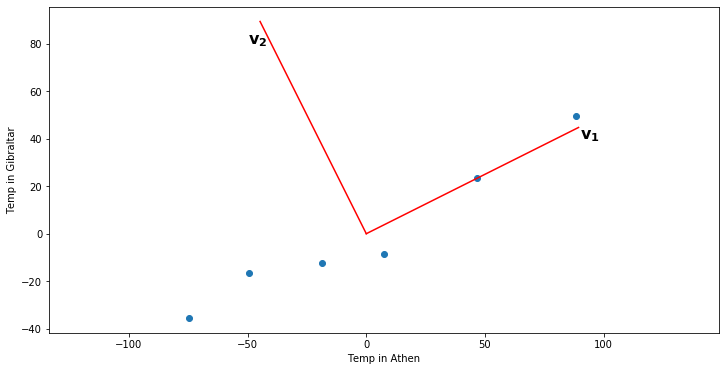

In [75]:
plt.scatter(Z[:,0],Z[:,1])
plt.plot((0,100*evec[0,0]) ,(0,100*evec[1,0])  , color='r'  )
plt.plot((0,100*evec[0,1]) ,(0,100*evec[1,1])  , color='r'  )
plt.axis('equal')
plt.xlabel('Temp in ' +lbl[0])
plt.ylabel('Temp in ' +lbl[1])
plt.text(90, 40, r'$\mathbf{v_{1}}$',fontsize=16)
plt.text(-50, 80, r'$\mathbf{v_{2}}$',fontsize=16)
plt.show()